### NRT Lectures - Statistical Modeling

# Generalized Linear Models

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt 
import math

### Example 1:  Psych Data

In [3]:
psych = pd.read_table("psych.txt", sep=" ")

In [4]:
print (psych)

    ill  x1  x2  x3  x4  x5
0     1   2   2   2   2   2
1     1   2   2   2   1   2
2     1   1   1   2   1   1
3     1   2   2   2   1   2
4     1   1   1   2   1   2
5     1   1   1   2   1   1
6     1   2   2   2   2   2
7     1   1   1   2   1   2
8     1   1   1   2   1   2
9     1   2   1   2   1   2
10    1   2   2   2   1   2
11    1   2   1   2   1   2
12    1   1   1   2   2   2
13    1   1   1   2   1   2
14    1   3   3   2   3   2
15    0   4   3   3   3   2
16    0   3   3   2   3   3
17    0   3   2   2   3   2
18    0   4   2   2   2   2
19    0   2   3   2   3   3
20    0   2   2   2   2   3
21    0   3   2   2   1   3
22    0   3   3   2   1   3
23    0   2   2   2   2   2
24    0   3   1   3   4   4
25    0   2   2   3   1   2
26    0   3   2   2   4   2
27    0   3   2   2   3   3
28    0   2   2   2   3   1
29    0   3   2   4   3   3
30    0   3   1   3   1   3
31    0   1   2   2   1   2
32    0   3   3   2   4   3
33    0   2   3   2   4   3
34    0   3   3   3 

In [5]:
endog = psych.iloc[:,0] #y: ill
exog = sm.add_constant(psych.iloc[:,1:6]) # x1-x5 with the interception

psychfit1 = sm.GLM(endog, exog, family=sm.families.Binomial())
result1 = psychfit1.fit()
print(result1.summary())

NameError: name 'sm' is not defined

In [37]:
# In another way
logistic_model = logit('ill ~ x1+x2+x3+x4+x5',psych)
result = logistic_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.285038
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    ill   No. Observations:                   45
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                  0.5522
Time:                        17:02:36   Log-Likelihood:                -12.827
converged:                       True   LL-Null:                       -28.643
Covariance Type:            nonrobust   LLR p-value:                 7.023e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2226      6.332      2.404      0.016       2.812      27.633
x1            -0.6757      0.

In [6]:
# Try using the total score only.
endog = psych.iloc[:,0] #y: ill
np.sum(psych.iloc[:,1:6], axis=1) # calcuate the row sum
exog = sm.add_constant(np.sum(psych.iloc[:,1:6], axis=1))

psychfit2 = sm.GLM(endog, exog, family=sm.families.Binomial())
result2 = psychfit2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    ill   No. Observations:                   45
Model:                            GLM   Df Residuals:                       43
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.686
Date:                Thu, 20 Feb 2020   Deviance:                       27.373
Time:                        18:46:43   Pearson chi2:                     54.7
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0331      3.145      3.190      0.0

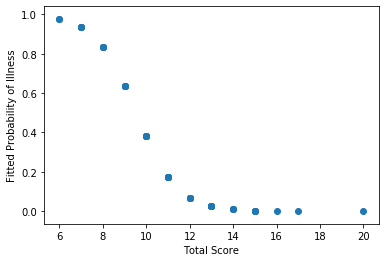

In [7]:
# Plot fitted probabilities of illness versus the total score:
def p(x):   # Calcuate the fitted probabilities
    e = result2.params["const"]+result2.params[0]*x
    return(math.exp(e)/(1+math.exp(e)))

fitprob = list(map(p, np.sum(psych.iloc[:,1:6], axis=1))) 

# plotting the points  
plt.scatter(np.sum(psych.iloc[:,1:6], axis=1), fitprob)
  
# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

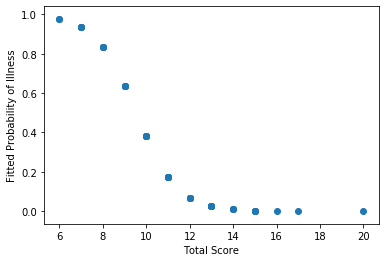

In [10]:
# Plot fitted probabilities of illness versus the total score:
fitprob = result2.predict(sm.add_constant(np.sum(psych.iloc[:,1:6], axis=1)))

# plotting the points  
plt.scatter(np.sum(psych.iloc[:,1:6], axis=1), fitprob)
  
# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

### Example 2: Snoring & Heart Disease Data

In [14]:
data = np.array([(24, 1355, 0),(35, 603, 2),(21,192, 4), (30, 224, 5)])
snoreheart = pd.DataFrame(data, columns=['Disease',  'NoDisease',  'Snoring'])
snoreheart

Disease  NoDisease  Snoring
0       24       1355        0
1       35        603        2
2       21        192        4
3       30        224        5

In [15]:
endog = snoreheart.iloc[:,:2] #y: Disease and NoDisease
exog = sm.add_constant(snoreheart.Snoring) # Snoring with the interception

snorefit = sm.GLM(endog, exog, family=sm.families.Binomial())
result3 = snorefit.fit()
print(result3.summary())

                    Generalized Linear Model Regression Results                     
Dep. Variable:     ['Disease', 'NoDisease']   No. Observations:                    4
Model:                                  GLM   Df Residuals:                        2
Model Family:                      Binomial   Df Model:                            1
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -11.531
Date:                      Fri, 21 Feb 2020   Deviance:                       2.8089
Time:                              20:11:21   Pearson chi2:                     2.87
No. Iterations:                           7                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

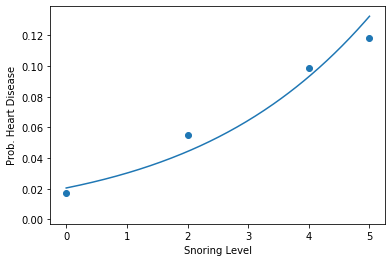

In [16]:
plt.scatter(snoreheart.Snoring, snoreheart.Disease/(snoreheart.Disease+snoreheart.NoDisease))
plt.xlabel('Snoring Level')
plt.ylabel('Prob. Heart Disease')
x = np.linspace(0, 5, 200)
plt.plot(x, result3.predict(sm.add_constant(x)))
plt.show()

### Example 3: Horseshoe Crab Data

In [17]:
horseshoe = pd.read_table("horseshoe.txt", sep = " ")
horseshoe = horseshoe.iloc[:,:6]

In [18]:
horseshoe

color  spine  width  satell  weight  y
0        3      3   28.3       8    3050  1
1        4      3   22.5       0    1550  0
2        2      1   26.0       9    2300  1
3        4      3   24.8       0    2100  0
4        4      3   26.0       4    2600  1
..     ...    ...    ...     ...     ... ..
168      4      3   26.1       3    2750  1
169      4      3   29.0       4    3275  1
170      2      1   28.0       0    2625  0
171      5      3   27.0       0    2625  0
172      3      2   24.5       0    2000  0

[173 rows x 6 columns]

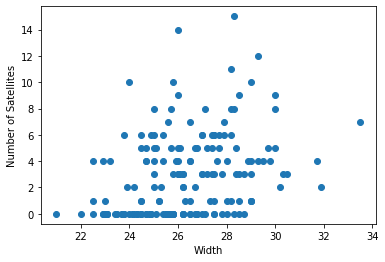

In [19]:
# plotting the points  
plt.scatter(horseshoe.width, horseshoe.satell) 
  
# naming the x axis 
plt.xlabel('Width') 
# naming the y axis 
plt.ylabel('Number of Satellites') 

# function to show the plot 
plt.show() 

In [20]:
endog = horseshoe.satell
exog = sm.add_constant(horseshoe.width)

snorefit = sm.GLM(endog, exog, family=sm.families.Poisson())
result4 = snorefit.fit()
print(result4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 satell   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.59
Date:                Fri, 21 Feb 2020   Deviance:                       567.88
Time:                        20:13:39   Pearson chi2:                     544.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3048      0.542     -6.095      0.0

### Example 4: British Train Collisions

In [21]:
tc = pd.read_table("traincollisions.txt", sep = " ")
tc

Year   KM  Train  TrRd
0   2003  518      0     3
1   2002  516      1     3
2   2001  508      0     4
3   2000  503      1     3
4   1999  505      1     2
5   1998  487      0     4
6   1997  463      1     1
7   1996  437      2     2
8   1995  423      1     2
9   1994  415      2     4
10  1993  425      0     4
11  1992  430      1     4
12  1991  439      2     6
13  1990  431      1     2
14  1989  436      4     4
15  1988  443      2     4
16  1987  397      1     6
17  1986  414      2    13
18  1985  418      0     5
19  1984  389      5     3
20  1983  401      2     7
21  1982  372      2     3
22  1981  417      2     2
23  1980  430      2     2
24  1979  426      3     3
25  1978  430      2     4
26  1977  425      1     8
27  1976  426      2    12
28  1975  436      5     2

In [22]:
endog = tc.TrRd
exog = sm.add_constant(tc.Year-1975)

tcfit = sm.GLM(endog, exog, offset = np.log(tc.KM), family=sm.families.Poisson()) #offset = log(KM)
result5 = tcfit.fit()
print(result5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   TrRd   No. Observations:                   29
Model:                            GLM   Df Residuals:                       27
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -64.760
Date:                Fri, 21 Feb 2020   Deviance:                       37.853
Time:                        20:14:26   Pearson chi2:                     42.2
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2114      0.159    -26.500      0.0

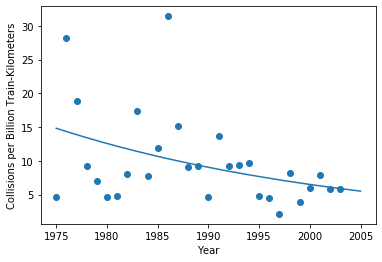

In [24]:
plt.scatter(tc.Year, 1000*tc.TrRd/tc.KM)
plt.ylabel('Collisions per Billion Train-Kilometers')
plt.xlabel('Year')
newyear = np.linspace(1975, 2005, 200)
KM = [1]*200
result5.predict(sm.add_constant(newyear-1975), offset = np.log(KM)) # predict when KM=1, log(1)=0
# result5.predict(sm.add_constant(newyear-1975), offset = [0]*200)
plt.plot(newyear, 1000 * result5.predict(sm.add_constant(newyear-1975), offset =  np.log(KM)))
plt.show()